<h1 align=center> Anti-Windup: <h1>

In [1]:
import control as ct
import numpy as np
import matplotlib.pyplot as plt
import scienceplots

# Configurações de plot:
plt.style.use([
    'grid',
    'retro'
])
#plt.rcParams['lines.linewidth'] = 3
#plt.rcParams['font.size'] = 20
plt.rcParams['figure.figsize'] = (12, 5)

<h3 align=center> Sistema: <h3>

In [2]:
#Definicao do sistema:
s = ct.tf('s')
G = ((s+1)**-2)

G

TransferFunction(array([1]), array([1, 2, 1]))

<h3 align=center> Definicoes de simulacao: <h3>

In [3]:
#Dados para simulacao:
#Definicao do vetor de tempo:
ts = 1e-2
time = np.arange(0, 10, ts)

#Definicao do vetor de referencia:
ref = np.ones(time.shape)

#Parametros do cotnrolador:
kp = 2
ti = 1
td = 0.5

<h3 align=center> Simulacao normal, sem windup: <h3>

/home/erick/.local/lib/python3.10/site-packages/control/timeresp.py:990: RuntimeWarning: invalid value encountered in scalar divide
  dt = (T[-1] - T[0]) / (n_steps - 1)


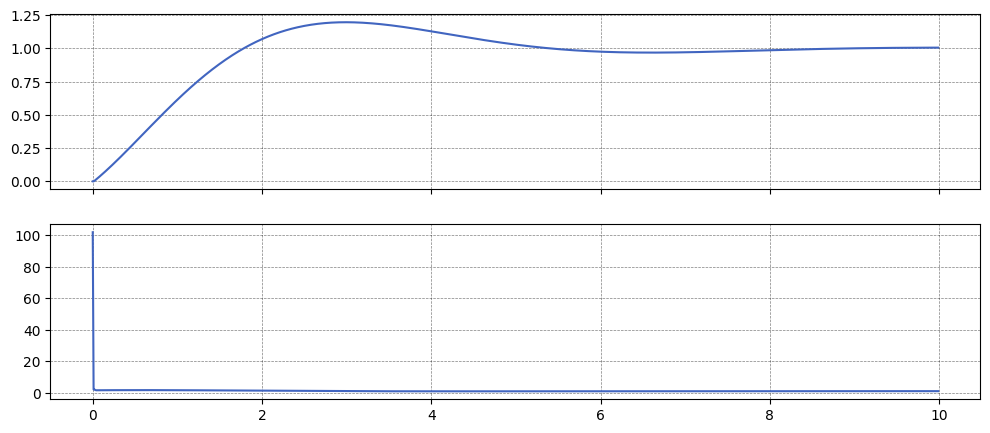

In [4]:
#Definicao dos vetores de saida e erro do controlador:
out1 = np.empty(time.shape)
usig1 = np.empty(time.shape)

#Definicoes de constantes e variaveis:
ie = 0
ea = 0
u = 0
y = 0

#Loop de simulacao iterativo:
for i in range(0, len(time)):
    #Atualizacao do sinal de controle:
    e = ref[i]-y
    ie += e*ts
    de = ((e-ea)/ts)
    ea = e
    u = ((kp*e)+((kp/ti)*ie)+(kp*td*de))
    #Salvando nos vetores:
    usig1[i] = u
    if(i):
        #Simulando o sistema e armazenando a saida:
        y = ct.forced_response(G, time[:i], usig1[:i])[1][i-1]
    out1[i] = y

plt.subplots(2, 1, sharex=True)
plt.subplot(2,1,1)
plt.plot(time, out1)
plt.subplot(2,1,2)
plt.plot(time, usig1)
plt.show()

<h3 align=center> Back Calculation: <h3>

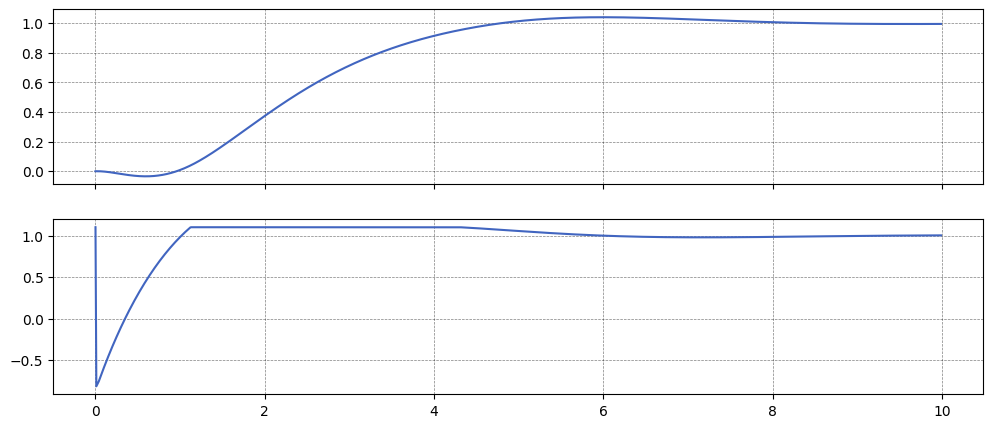

In [5]:
#Definicoes do anti-windup:
usat = 1.1
tb = np.sqrt(td*ti)

#Definicao dos vetores de saida e erro do controlador:
out2 = np.empty(time.shape)
usig2 = np.empty(time.shape)

#Definicoes de constantes e variaveis:
ie = 0
ea = 0
u = 0
y = 0
bc = 0

#Loop de simulacao iterativo:
for i in range(0, len(time)):
    #Atualizacao do sinal de controle:
    e = ref[i]-y
    ie += ((e-bc)*ts)
    de = ((e-ea)/ts)
    ea = e
    u = ((kp*e)+((kp/ti)*ie)+(kp*td*de))
    #Back Calculation:
    if(abs(u)>usat):
        bc = ((u-usat)*(1/tb))
        u = usat*u/abs(u)
    else:
        bc = 0
    #Salvando nos vetores:
    usig2[i] = u
    if(i):
        #Simulando o sistema e armazenando a saida:
        y = ct.forced_response(G, time[:i], usig2[:i])[1][i-1]
    out2[i] = y

plt.subplots(2, 1, sharex=True)
plt.subplot(2,1,1)
plt.plot(time, out2)
plt.subplot(2,1,2)
plt.plot(time, usig2)
plt.show()